In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
data1 = pd.read_csv(city_data_to_load)
data2 = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
df1=pd.merge(data2, data1, how='left', on='city')
# Display the data table for preview
df1.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
urban_cities = df1[df1["type"] == "Urban"]
suburban_cities = df1[df1["type"] == "Suburban"]
rural_cities = df1[df1["type"] == "Rural"]

In [3]:
#df2= df1.groupby(["type"])

x1=urban_cities.groupby(["city"])["ride_id"].count()
y1=urban_cities.groupby(["city"])["fare"].mean()
z1=urban_cities.groupby(["city"])["driver_count"].mean()

x2=suburban_cities.groupby(["city"])["ride_id"].count()
y2=suburban_cities.groupby(["city"])["fare"].mean()
z2=suburban_cities.groupby(["city"])["driver_count"].mean()

x3=rural_cities.groupby(["city"])["ride_id"].count()
y3=rural_cities.groupby(["city"])["fare"].mean()
z3=rural_cities.groupby(["city"])["driver_count"].mean()

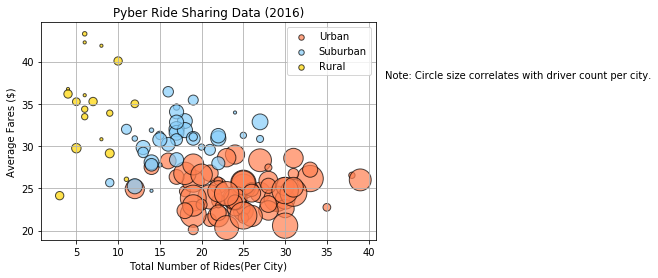

In [4]:
plt.scatter(x1, y1, s=z1*10, alpha= 0.7, edgecolor="black", color="coral", label= "Urban") 
plt.scatter(x2, y2, s=z2*10, alpha= 0.7, edgecolor="black", color="lightskyblue", label= "Suburban")
plt.scatter(x3, y3, s=z3*10, alpha= 0.7, edgecolor="black", color="gold", label= "Rural")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fares ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
lgnd=plt.legend()
for handler in lgnd.legendHandles:
    handler._sizes = [30]
plt.text(42,38,"Note: Circle size correlates with driver count per city.")    
plt.show()

## Total Fares by City Type

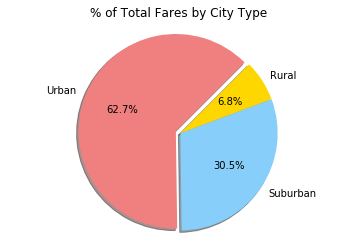

In [5]:
# Calculate Type Percents
total_fares=df1["fare"].sum()

x4=urban_cities["fare"].sum()/total_fares
x5=suburban_cities["fare"].sum()/total_fares
x6=rural_cities["fare"].sum()/total_fares
# Build Pie Chart
types=df1["type"].unique()
fare_percents=[x4, x5, x6]
colors=["lightcoral", "lightskyblue", "gold"]
explode=[0.05, 0, 0]

total_fare_percents=plt.pie(fare_percents, explode=explode, labels=types, colors=colors, autopct="%.1f%%", shadow=True, startangle=45)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
# Show Figure
plt.show()


## Total Rides by City Type

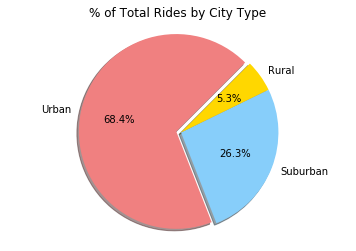

In [6]:
# Calculate Ride Percents
total_rides=df1["ride_id"].count()

x7=urban_cities["ride_id"].count()/total_rides
x8=suburban_cities["ride_id"].count()/total_rides
x9=rural_cities["ride_id"].count()/total_rides

# Build Pie Chart
ride_percents=[x7, x8, x9]
colors=["lightcoral", "lightskyblue", "gold"]
explode=[0.05, 0, 0]

total_fare_percents=plt.pie(ride_percents, explode=explode, labels=types, colors=colors, autopct="%.1f%%", shadow=True, startangle=45)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
# Show Figure
plt.show()
# Save Figure


## Total Drivers by City Type

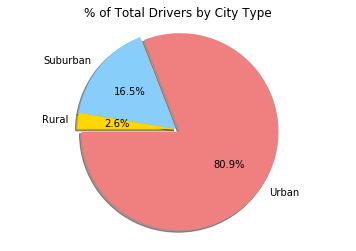

In [21]:
# Calculate Driver Percents
total_drivers=data1["driver_count"].sum()
urban_cities2 = data1[data1["type"] == "Urban"]
suburban_cities2 = data1[data1["type"] == "Suburban"]
rural_cities2 = data1[data1["type"] == "Rural"]

x10=urban_cities2["driver_count"].sum()/total_drivers
x11=suburban_cities2["driver_count"].sum()/total_drivers
x12=rural_cities2["driver_count"].sum()/total_drivers

# Build Pie Chart
driver_percents=[x10, x11, x12]
colors=["lightcoral", "lightskyblue", "gold"]
explode=[0.05, 0, 0]

total_driver_percents=plt.pie(driver_percents, explode=explode, labels=types, colors=colors, autopct="%.1f%%", shadow=True, startangle=180)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
# Show Figure
plt.show()

In [ ]:
# Assignment 5 Summary of Trends

# Observable trends in Pyber: There’s a lot of people needing rides in urban cities. 
# The urban percent of total fares, total rides and total drivers far outnumber that of the other city type. 
# Although this is observable based on the pie graphs, the bubble graph shows that rural city types have a higher average
# fare for less number of rides. This probably has to do with longer distances and time traveled in rural areas. 
#Populations are also less in rural areas, therefore, less drivers and less rides needed.
